In [1]:
# This is a machine learning project for predicting the salary of a employee using some data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
import joblib

In [2]:
data = pd.read_csv(r"C:\Users\visha\OneDrive\Desktop\employee_salary_prediction\data\employee-dataset.csv")

In [3]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
#finding null values
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
data.shape

(48842, 15)

In [8]:
print(data['age'].value_counts())

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64


In [9]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [10]:
print(data['fnlwgt'].value_counts())

fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
436163     1
320084     1
125976     1
211349     1
120478     1
Name: count, Length: 28523, dtype: int64


In [11]:
print(data['education'].value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [12]:
print(data['educational-num'].value_counts())

educational-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64


In [13]:
print(data['marital-status'].value_counts())

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


In [14]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [15]:
print(data['relationship'].value_counts())

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64


In [16]:
print(data['race'].value_counts())

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64


In [17]:
  print(data.gender.value_counts())

gender
Male      32650
Female    16192
Name: count, dtype: int64


In [18]:
print(data['capital-gain'].value_counts())

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
6612         1
1111         1
22040        1
1639         1
2387         1
Name: count, Length: 123, dtype: int64


In [19]:
print(data['capital-loss'].value_counts())

capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
2489        1
2080        1
155         1
2201        1
Name: count, Length: 99, dtype: int64


In [20]:
print(data['hours-per-week'].value_counts())

hours-per-week
40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
79        1
94        1
87        1
69        1
82        1
Name: count, Length: 96, dtype: int64


In [21]:
print(data['native-country'].value_counts())

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

In [22]:
print(data['income'].value_counts())

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [23]:
# data['occupation']  = data['occupation'].replace({'?':'others'})
# data['workclass']  = data['occupation'].replace({'?':'others'})
# data['native-country']  = data['native-country'].replace({'?':'unknown'})
data.replace('?', np.nan, inplace=True)

In [24]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [25]:
print(f"Original rows: {data.shape[0]}")
print(f"Rows with missing values: {data[data.isnull().any(axis=1)].shape[0]}")

Original rows: 48842
Rows with missing values: 3620


In [26]:
# the null data is only 7% so droping it is not gonna affect the model training
data.dropna(inplace=True)

In [27]:
# droping redundant and useless columns
data.drop(columns = ['education'],inplace=True)
data.drop(columns = ['fnlwgt'],inplace = True)

In [28]:
data.shape

(45222, 13)

In [29]:
data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']

In [30]:
data['occupation'] = data['occupation'].replace('Armed-Forces', 'Other-service')

In [31]:
data

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


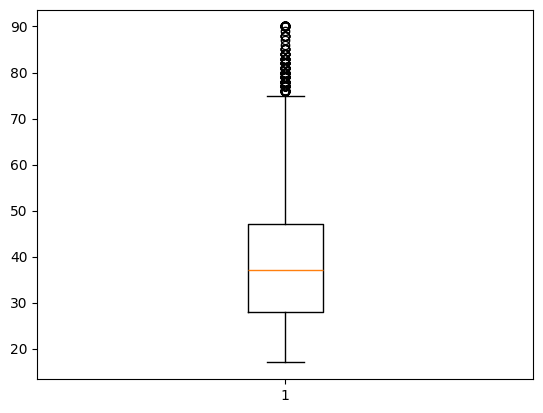

In [32]:
plt.boxplot(data['age'])
plt.show()

In [33]:
data=data[(data['age']<=75)&(data['age']>=17)]

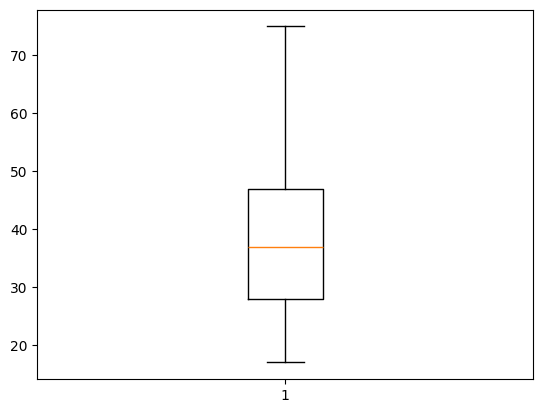

In [34]:
plt.boxplot(data['age'])
plt.show()

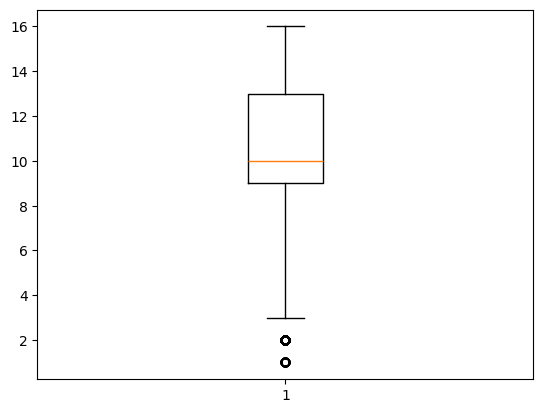

In [35]:
plt.boxplot(data['educational-num'])
plt.show()

In [36]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

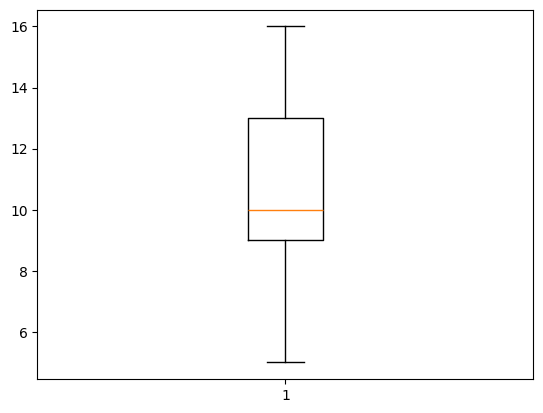

In [37]:
plt.boxplot(data['educational-num'])
plt.show()

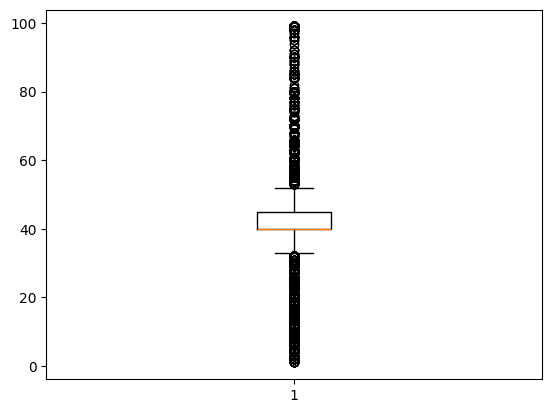

In [38]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [39]:
# all the outliers are removed

In [40]:
data.shape

(43420, 13)

In [41]:
data

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [42]:
x=data.drop(columns=['income'])
y=data['income']
x

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [43]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
5        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 43420, dtype: object

In [46]:
# preprocessing using scaler and encoder with pipeline
from sklearn.compose  import ColumnTransformer 
numerical_cols = ['age','educational-num', 'hours-per-week', 'capital-gain', 'capital-loss']
categorical_cols = [col for col in x.columns if col not in numerical_cols]

preprocessor = ColumnTransformer(transformers=[
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('scaler', StandardScaler(), numerical_cols)
])

In [48]:
# training the model using the data and ml algos
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, solver='saga'),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 0.8206
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      6485
        >50K       0.72      0.47      0.57      2199

    accuracy                           0.82      8684
   macro avg       0.78      0.71      0.73      8684
weighted avg       0.81      0.82      0.81      8684

RandomForest Accuracy: 0.8455
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      6485
        >50K       0.72      0.64      0.68      2199

    accuracy                           0.85      8684
   macro avg       0.80      0.78      0.79      8684
weighted avg       0.84      0.85      0.84      8684

GradientBoosting Accuracy: 0.8614
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      6485
        >50K       0.79      0.61      0.69      2199

    accuracy                           0.86      8684
   macro avg       0.84     

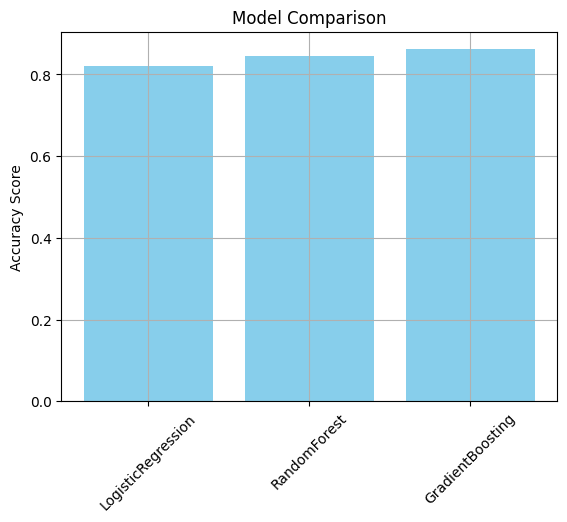

In [49]:
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [51]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000,solver='saga'),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

    if acc == max(results.values()):
        best_pipeline = pipe

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model with pipeline
joblib.dump(best_pipeline, "best_model.pkl")
print("✅ Saved full pipeline (preprocessing + model) as best_model.pkl")

LogisticRegression Accuracy: 0.8206
RandomForest Accuracy: 0.8437
GradientBoosting Accuracy: 0.8614

✅ Best model: GradientBoosting with accuracy 0.8614
✅ Saved full pipeline (preprocessing + model) as best_model.pkl


In [60]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load model
model = joblib.load("best_model.pkl")

# Page settings
st.set_page_config(page_title="Salary Classifier using ML", page_icon="💼", layout="wide")

# Title and subtitle
st.markdown("<h1 style='text-align: center;'>💼 Employee Salary Classification App</h1>", unsafe_allow_html=True)
st.markdown("<h4 style='text-align: center;'>Predict if an employee earns >50K or ≤50K using ML Alogorithms</h4>", unsafe_allow_html=True)
st.markdown("---")

# Input Form
st.sidebar.header("📝 Enter Employee Details")

with st.sidebar:
    age = st.slider("🎂 Age", 18, 90, 30)
    educational_num = st.slider("🎓 Education Level (Numerical)", 1, 16, 10)
    capital_gain = st.number_input("💰 Capital Gain", min_value=0, value=0)
    capital_loss = st.number_input("📉 Capital Loss", min_value=0, value=0)
    hours_per_week = st.slider("⏱ Hours per Week", 1, 99, 40)

    st.markdown("---")

    workclass = st.selectbox("🏢 Workclass", [
        'Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 
        'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'
    ])
    marital_status = st.selectbox("💍 Marital Status", [
        'Never-married', 'Married-civ-spouse', 'Divorced', 'Separated', 
        'Widowed', 'Married-spouse-absent'
    ])
    occupation = st.selectbox("💼 Occupation", [
        'Tech-support', 'Craft-repair', 'Other-service', 'Sales', 
        'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct',
        'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv',
        'Protective-serv', 'Armed-Forces'
    ])
    relationship = st.selectbox("👨‍👩‍👧‍👦 Relationship", [
        'Wife', 'Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Other-relative'
    ])
    race = st.selectbox("🌐 Race", [
        'White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'
    ])
    gender = st.selectbox("⚧ Gender", ['Male', 'Female'])
    native_country = st.selectbox("🌎 Native Country", [
        'United-States', 'Mexico', 'Philippines', 'Germany', 'Canada', 'India',
        'England', 'Cuba', 'Jamaica', 'South', 'China', 'Italy', 'Poland', 
        'Columbia', 'Vietnam', 'Guatemala', 'Japan', 'Other'
    ])

# Collect input in DataFrame
input_data = pd.DataFrame([{
    'age': age,
    'educational-num': educational_num,
    'capital-gain': capital_gain,
    'capital-loss': capital_loss,
    'hours-per-week': hours_per_week,
    'workclass': workclass,
    'marital-status': marital_status,
    'occupation': occupation,
    'relationship': relationship,
    'race': race,
    'gender': gender,
    'native-country': native_country
}])

# Display input
st.markdown("### 🔍 Preview of Input Data")
st.dataframe(input_data)

# Prediction
if st.button("🔮 Predict Salary Class"):
    prediction = model.predict(input_data)
    label = prediction[0]
    emoji = "💸" if label == ">50K" else "👛"
    st.success(f"🎯 Prediction: **{label}** {emoji}")

# Optional Footer
st.markdown("---")
st.markdown("<small style='text-align: center; display: block;'>Made by Vishal Keshri · MCA Student of MANIT BHOPAL</small>", unsafe_allow_html=True)


Overwriting app.py


In [ ]:
!streamlit run app.py